<a href="https://colab.research.google.com/github/abhishek22112001/Ai-finalproject/blob/main/HEART_DISEASE_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc

from sklearn.tree import DecisionTreeClassifier # Import DecisionTreeClassifier


In [4]:
data = pd.read_csv('https://raw.githubusercontent.com/abdelDebug/Heart-Disease-Data/refs/heads/main/heart_disease.csv')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2,0
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1,1
2,67,1,3,120,229,0,2,129,1,2.6,1,2,3,1
3,37,1,2,130,250,0,0,187,0,3.5,2,0,1,0
4,41,0,1,130,204,0,2,172,0,1.4,0,0,1,0


In [5]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,45,1,0,110,264,0,0,132,0,1.2,1,0,3,1
299,68,1,3,144,193,1,0,141,0,3.4,1,2,3,1
300,57,1,3,130,131,0,0,115,1,1.2,1,1,3,1
301,57,0,1,130,236,0,2,174,0,0.0,1,1,1,1
302,38,1,2,138,175,0,0,173,0,0.0,0,0,1,0


In [6]:
data.shape

(303, 14)

In [7]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,2.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,0.600660,0.663366,1.831683,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.934375,0.956705,0.499120
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,1.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,3.000000,1.000000


In [8]:
data.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [9]:
data['target'].value_counts()

,count
target,
0,164
1,139


In [11]:
data.duplicated().sum()

0

In [12]:
data.mean()

,0
age,54.438944
sex,0.679868
cp,2.158416
trestbps,131.689769
chol,246.693069
fbs,0.148515
restecg,0.990099
thalach,149.607261
exang,0.326733
oldpeak,1.039604


In [13]:
data.median()

,0
age,56.0
sex,1.0
cp,2.0
trestbps,130.0
chol,241.0
fbs,0.0
restecg,1.0
thalach,153.0
exang,0.0
oldpeak,0.8


In [14]:
data.mode()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,58.0,1.0,3.0,120.0,197,0.0,0.0,162.0,0.0,0.0,0.0,0.0,1.0,0.0
1,NaN,NaN,NaN,NaN,204,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
imputer = SimpleImputer(strategy='mean')
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)
#scale the imputed data
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data_imputed), columns=data.columns)
print(data_scaled)

          age       sex        cp  trestbps      chol       fbs   restecg  \
0    0.948726  0.686202 -2.251775  0.757525 -0.264900  2.394438  1.016684   
1    1.392002  0.686202  0.877985  1.611220  0.760415 -0.417635  1.016684   
2    1.392002  0.686202  0.877985 -0.665300 -0.342283 -0.417635  1.016684   
3   -1.932564  0.686202 -0.165268 -0.096170  0.063974 -0.417635 -0.996749   
4   -1.489288 -1.457296 -1.208521 -0.096170 -0.825922 -0.417635  1.016684   
..        ...       ...       ...       ...       ...       ...       ...   
298 -1.046013  0.686202 -2.251775 -1.234430  0.334813 -0.417635 -0.996749   
299  1.502821  0.686202  0.877985  0.700612 -1.038723  2.394438 -0.996749   
300  0.283813  0.686202  0.877985 -0.096170 -2.238149 -0.417635 -0.996749   
301  0.283813 -1.457296 -1.208521 -0.096170 -0.206864 -0.417635  1.016684   
302 -1.821745  0.686202 -0.165268  0.359134 -1.386944 -0.417635 -0.996749   

      thalach     exang   oldpeak     slope        ca      thal    target  

In [8]:
X = data.drop('target', axis=1)
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train)
print(y_train)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
132   29    1   1       130   204    0        2      202      0      0.0   
202   57    1   2       150   126    1        0      173      0      0.2   
196   69    1   0       160   234    1        2      131      0      0.1   
75    65    0   2       160   360    0        2      151      0      0.8   
176   52    1   3       108   233    1        0      147      0      0.1   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
188   54    1   1       192   283    0        2      195      0      0.0   
71    67    1   3       125   254    1        0      163      0      0.2   
106   59    1   3       140   177    0        0      162      1      0.0   
270   61    1   3       140   207    0        2      138      1      1.9   
102   57    0   3       128   303    0        2      159      0      0.0   

     slope  ca  thal  
132      0   0     1  
202      0   1     3  
196      1   1    

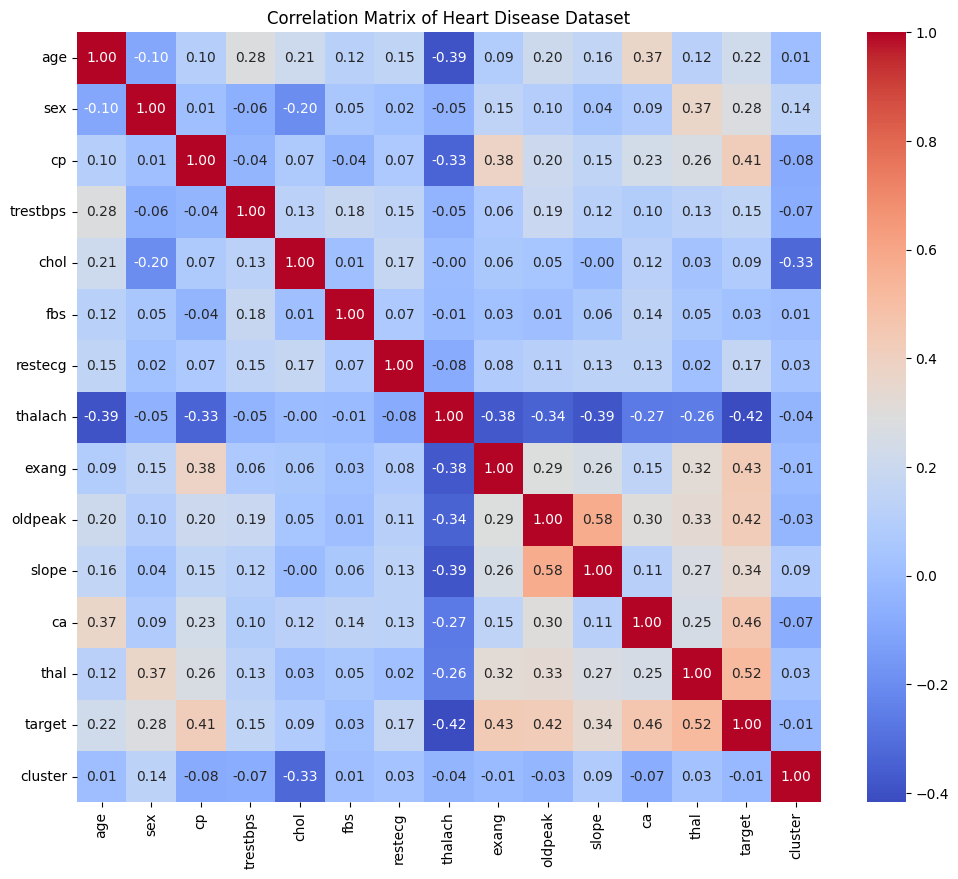

In [21]:
correlation_matrix = data.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Heart Disease Dataset')
plt.show()

Confusion Matrix:
 [[22  7]
 [ 8 24]]

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.76      0.75        29
           1       0.77      0.75      0.76        32

    accuracy                           0.75        61
   macro avg       0.75      0.75      0.75        61
weighted avg       0.75      0.75      0.75        61

Accuracy: 75.41%


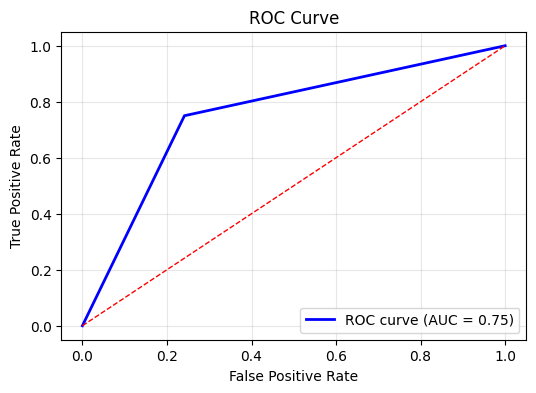

AUC Score: 0.75


In [9]:
#Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

cr = classification_report(y_test, y_pred)
print("\nClassification Report:\n", cr)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

y_pred_proba = dt_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()
print(f"AUC Score: {roc_auc:.2f}")

Confusion Matrix:
 [[26  3]
 [ 5 27]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

Accuracy: 86.89%


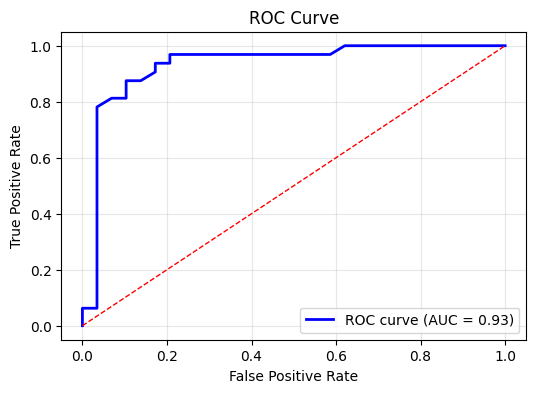

AUC Score: 0.93


In [18]:
#Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

cr = classification_report(y_test, y_pred)
print("\nClassification Report:\n", cr)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

y_pred_proba = rf_model.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc_rf = auc(fpr_rf, tpr_rf)
plt.figure(figsize=(6, 4))
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label=f"ROC curve (AUC = {roc_auc_rf:.2f})")
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()
print(f"AUC Score: {roc_auc_rf:.2f}")

Logistic Regression Confusion Matrix:
 [[26  3]
 [ 3 29]]

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90        29
           1       0.91      0.91      0.91        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61

Logistic Regression Accuracy: 90.16%


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


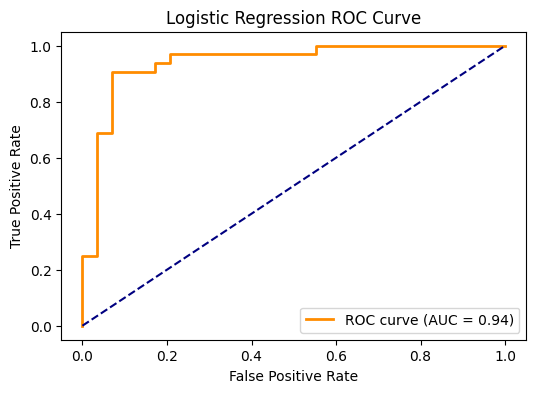

Logistic Regression AUC Score: 0.94


In [11]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression model
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train, y_train)

y_pred_logreg = logreg_model.predict(X_test)

cm_logreg = confusion_matrix(y_test, y_pred_logreg)
print("Logistic Regression Confusion Matrix:\n", cm_logreg)

cr_logreg = classification_report(y_test, y_pred_logreg)
print("\nLogistic Regression Classification Report:\n", cr_logreg)

accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f"Logistic Regression Accuracy: {accuracy_logreg * 100:.2f}%")

y_pred_proba_logreg = logreg_model.predict_proba(X_test)[:, 1]
fpr_logreg, tpr_logreg, thresholds_logreg = roc_curve(y_test, y_pred_proba_logreg)
roc_auc_logreg = auc(fpr_logreg, tpr_logreg)

plt.figure(figsize=(6, 4))
plt.plot(fpr_logreg, tpr_logreg, color='darkorange', lw=2, label=f"ROC curve (AUC = {roc_auc_logreg:.2f})")
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.legend(loc="lower right")
plt.show()

print(f"Logistic Regression AUC Score: {roc_auc_logreg:.2f}")

KNN Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.76      0.69        29
           1       0.73      0.59      0.66        32

    accuracy                           0.67        61
   macro avg       0.68      0.68      0.67        61
weighted avg       0.68      0.67      0.67        61

KNN Accuracy: 67.21%
KNN ROC AUC Score: 0.73


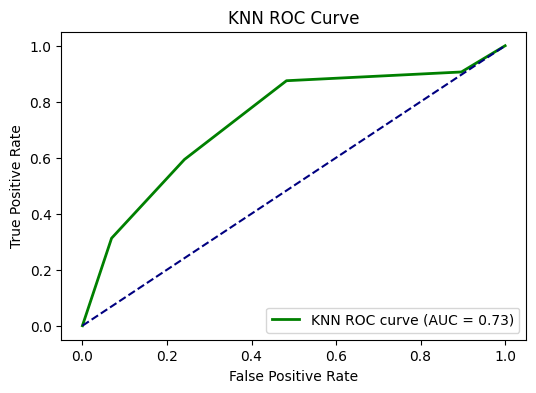

In [29]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)

knn_model.fit(X_train, y_train)

y_pred_knn = knn_model.predict(X_test)
cr_knn=classification_report(y_test, y_pred_knn)
print("KNN Classification Report:\n",cr_knn )

accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {accuracy_knn * 100:.2f}%")

y_pred_proba_knn = knn_model.predict_proba(X_test)[:, 1]

roc_auc_knn = roc_auc_score(y_test, y_pred_proba_knn)
print(f"KNN ROC AUC Score: {roc_auc_knn:.2f}")

fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_pred_proba_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

plt.figure(figsize=(6, 4))
plt.plot(fpr_knn, tpr_knn, color='green', lw=2, label=f"KNN ROC curve (AUC = {roc_auc_knn:.2f})")
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN ROC Curve')
plt.legend(loc="lower right")
plt.show()

               age       sex        cp    trestbps        chol       fbs  \
cluster                                                                    
0        56.467742  0.516129  2.338710  137.483871  321.274194  0.161290   
1        51.935185  0.731481  2.120370  127.648148  197.435185  0.129630   
2        55.526316  0.714286  2.105263  132.270677  251.924812  0.157895   

          restecg     thalach     exang   oldpeak     slope        ca  \
cluster                                                                 
0        1.129032  150.387097  0.370968  1.137097  0.548387  0.951613   
1        0.759259  150.574074  0.287037  1.006481  0.546296  0.472222   
2        1.112782  148.458647  0.338346  1.021053  0.669173  0.684211   

             thal    target  
cluster                      
0        1.838710  0.548387  
1        1.768519  0.370370  
2        1.879699  0.488722  


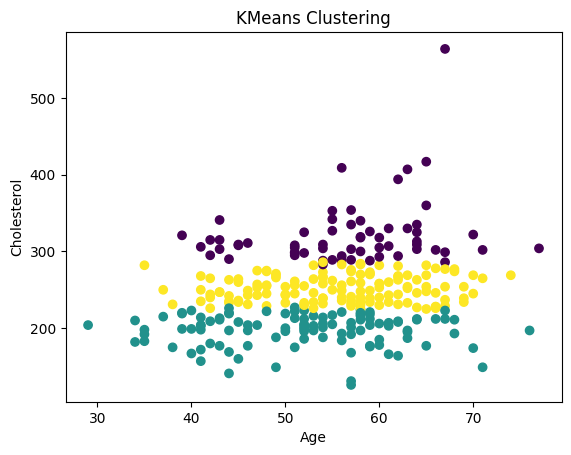

In [15]:
from sklearn.cluster import KMeans
#KMeans model
k = 3

kmeans = KMeans(n_clusters=k, random_state=42)

kmeans.fit(X)

cluster_labels = kmeans.labels_

data['cluster'] = cluster_labels

print(data.groupby('cluster').mean())

plt.scatter(data['age'], data['chol'], c=data['cluster'])
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.title('KMeans Clustering')
plt.show()

Naive Bayes Confusion Matrix:
 [[26  3]
 [ 6 26]]

Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.90      0.85        29
           1       0.90      0.81      0.85        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.86      0.85      0.85        61

Naive Bayes Accuracy: 85.25%


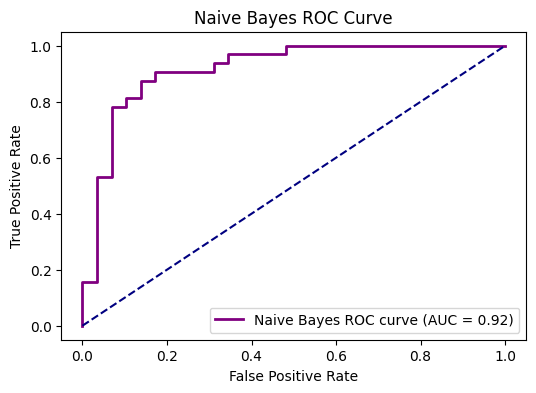

Naive Bayes AUC Score: 0.92


In [17]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()

nb_model.fit(X_train, y_train)

y_pred_nb = nb_model.predict(X_test)

cm_nb = confusion_matrix(y_test, y_pred_nb)
print("Naive Bayes Confusion Matrix:\n", cm_nb)

cr_nb = classification_report(y_test, y_pred_nb)
print("\nNaive Bayes Classification Report:\n", cr_nb)

accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Naive Bayes Accuracy: {accuracy_nb * 100:.2f}%")

y_pred_proba_nb = nb_model.predict_proba(X_test)[:, 1]
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, y_pred_proba_nb)
roc_auc_nb = auc(fpr_nb, tpr_nb)

plt.figure(figsize=(6, 4))
plt.plot(fpr_nb, tpr_nb, color='purple', lw=2, label=f"Naive Bayes ROC curve (AUC = {roc_auc_nb:.2f})")
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Naive Bayes ROC Curve')
plt.legend(loc="lower right")
plt.show()

print(f"Naive Bayes AUC Score: {roc_auc_nb:.2f}")

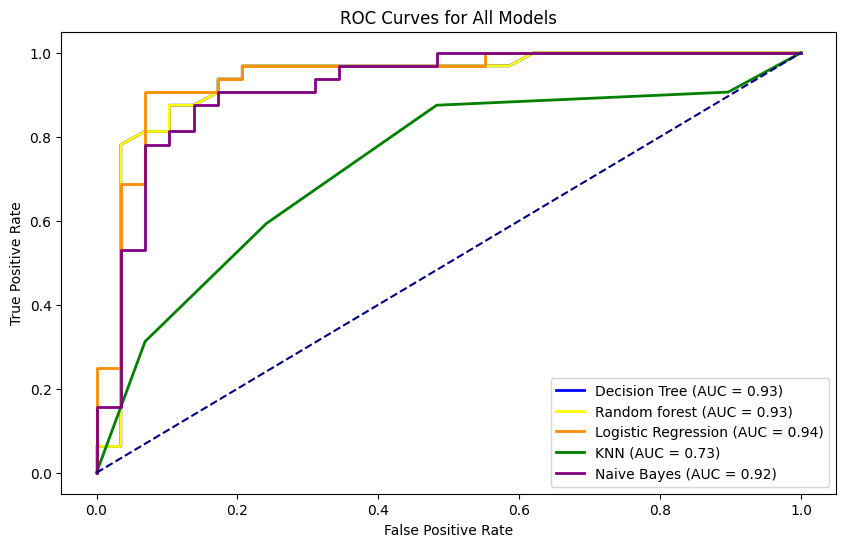

In [19]:
plt.figure(figsize=(10, 6))

# Plot each ROC curve
plt.plot(fpr, tpr, color='blue', lw=2, label=f"Decision Tree (AUC = {roc_auc:.2f})")
plt.plot(fpr_rf, tpr_rf, color='yellow', lw=2, label=f"Random forest (AUC = {roc_auc_rf:.2f})")
plt.plot(fpr_logreg, tpr_logreg, color='darkorange', lw=2, label=f"Logistic Regression (AUC = {roc_auc_logreg:.2f})")
plt.plot(fpr_knn, tpr_knn, color='green', lw=2, label=f"KNN (AUC = {roc_auc_knn:.2f})")
plt.plot(fpr_nb, tpr_nb, color='purple', lw=2, label=f"Naive Bayes (AUC = {roc_auc_nb:.2f})")

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for All Models')
plt.legend(loc="lower right")
plt.show()

In [22]:
print("\nDecision Tree Classification Report:\n", cr)
print("\nRandom Forest Classification Report:\n", cr)
print("\nLogistic Regression Classification Report:\n", cr_logreg)
print("\nKNN Classification Report:\n", classification_report(y_test, y_pred_knn))
print("\nNaive Bayes Classification Report:\n", cr_nb)


Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61


Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61


Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90        29
           1       0.91      0.91      0.91        32

    accuracy                           0.90        61
   ma

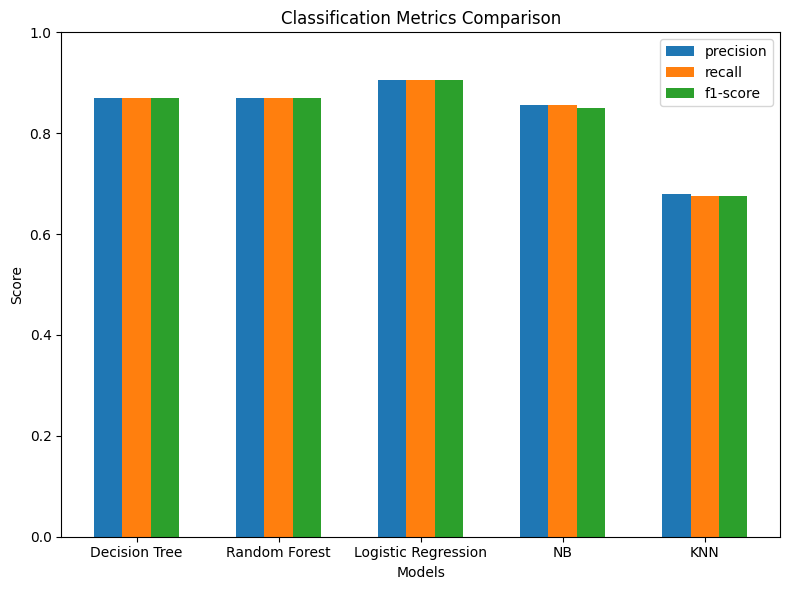

In [33]:
def extract_metrics(report_str):
    lines = report_str.strip().split('\n')
    metrics = {}
    for line in lines[2:-3]:
        parts = line.split()
        if len(parts) > 0:
          metrics[parts[0]] = {
              'precision': float(parts[1]),
              'recall': float(parts[2]),
              'f1-score': float(parts[3])
          }
    return metrics

models = {
       'Decision Tree': cr,
    'Random Forest': cr,
    'Logistic Regression': cr_logreg,
    'NB': cr_nb,
    'KNN': cr_knn
}

metrics_dict = {}
for model_name, report in models.items():
  metrics_dict[model_name] = extract_metrics(report)

plt.figure(figsize=(8, 6))
width = 0.2

x = np.arange(len(models))

for i, metric in enumerate(['precision', 'recall', 'f1-score']):
    values = [np.mean([v[metric] for k,v in metrics_dict[model].items()]) for model in models]
    plt.bar(x + i * width, values, width, label=metric)

plt.xticks(x + width, models.keys())
plt.xlabel("Models")
plt.ylabel("Score")
plt.title("Classification Metrics Comparison")
plt.ylim(0, 1.0)
plt.legend()
plt.tight_layout()
plt.show()

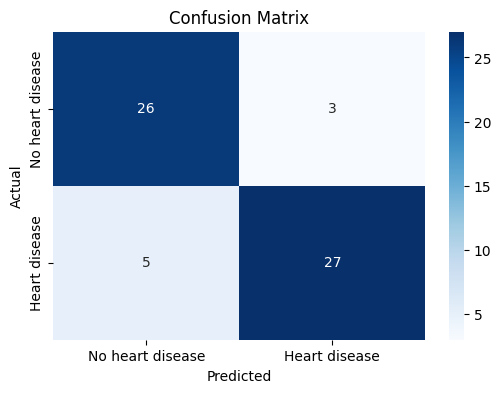

In [34]:
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No heart disease', 'Heart disease'], yticklabels=['No heart disease', 'Heart disease'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

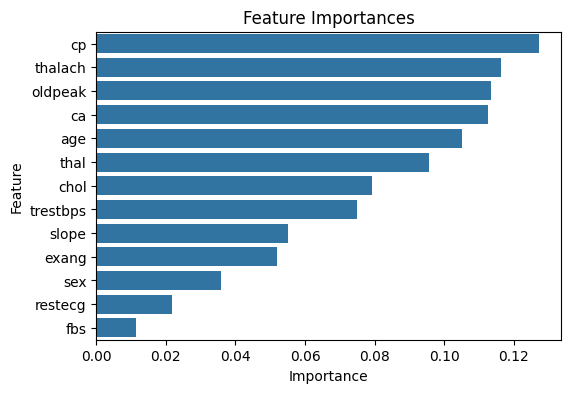

In [35]:

feature_importances = rf_model.feature_importances_

fi_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

fi_df = fi_df.sort_values('Importance', ascending=False)

plt.figure(figsize=(6,4))
sns.barplot(x='Importance', y='Feature', data=fi_df)
plt.title('Feature Importances')
plt.show()